In [16]:
# 피마 인디언 데이터 셋, 로지스틱 회귀 사용 (회귀모델이지만 분류모델로서 기능할 수 있어.)

import 및 개요

In [34]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve,roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


# font 등
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# mpl.rcParams['axes.unicode_minus'] = False
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [35]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)
# outcome이 타겟갑이겠다. 예측해야할 값 .y 

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [19]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


함수 정의 파트 다 못쳐서 긁어와..ㄷㄷ  
3줄 정의부


In [52]:
# 174p 06피마 인디언 바로 위
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [53]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [54]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

* Start

In [56]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.7919


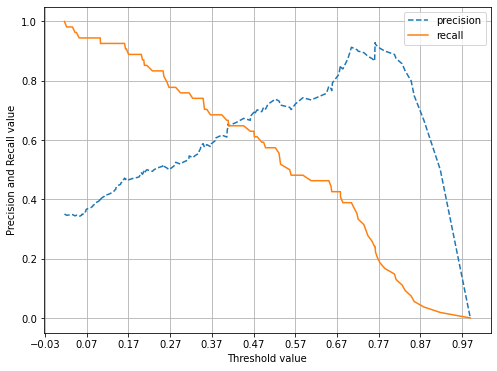

In [57]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [58]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

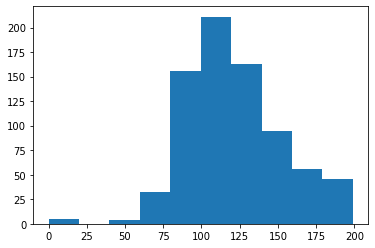

In [59]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [ ]:
# 0값을 검사할 피처 명 리스트
zero_features = ['Glucose', 'Bl']

In [ ]:
# 결손값 처리, info를 보아 결손값 없으므로 따로 채워줄 데이터 없어.
# 0~7 까지 x 값 / 8이 y 값
df.info()
#  0 : 임신횟수
#  1 : 포도당 부하 검사 수치
#  2 : 혈압
#  3 : 팔 삼두근 뒤쪽 피아지방 측정값
#  4.: 혈청 인슐린
#  5 : BMI 체질량지수
#  6 : 당뇨 내력 가중치 값
#  7 : 나이 
#  8 : 결과 ( 0 or 1 ) 당뇨냐 아니냐 분류에 사용할 값, y 값

# 768 row 9 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# pima는 Numpy n-dimansional array
pima = df.values
pima.shape

(768, 9)

In [ ]:
# X는 전체행, -2인덱스 열까지 선택 / y는 전체행, -1번 인덱스 열만 선택
X = pima[:,      :-1]   # 행 선택 , 열 선택
y = pima[:,       -1]   # 행 선택 , 열 선택
X.shape, y.shape


((768, 8), (768,))

### 2. 분류 모델만들기 및 평가

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler # 어떻게 쓸지 고민해보기

In [ ]:
# X = pima[:,      :-1]   # 행 선택 , 열 선택
# y = pima[:,       -1]   # 행 선택 , 열 선택

In [ ]:
# train_test_split  # 학습 셋 만들기
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2021)

# 로지스틱 회귀 분류 Logistic Regression Classifier (LRC)
lrc_clf = LogisticRegression()
lrc_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lrc_clf.score(X_test, y_test)

0.8051948051948052

In [ ]:
# 표준 정규분포로 변환된 데이터로 학습하면 에러가 발생하지 않음
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit_transform(X)

In [ ]:
df2 = pd.DataFrame(std)
df2.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.462585e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [ ]:
# 워닝은 미발생인데. 이유는 흠..
# 심지어 결과는 '0.8051948051948052'로 같다.
X_train, X_test, y_train, y_test = train_test_split(
   std, y, stratify=y, test_size=0.2, random_state=2021
)
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)

0.8051948051948052

In [ ]:
# 로지스틱 회귀 분류로 GridSearchCV 는 어떻게 사용하나?
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2021,
 'splitter': 'best'}

In [ ]:
dtc = DecisionTreeClassifier(random_state=2021)
params = {
    'max_depth' : [2, 3, 4, 5, 6],
    'min_samples_split' : [2, 3, 4]    
}

In [ ]:
grid_dt = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
grid_dt.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [ ]:
grid_dt.best_score_

0.734572837531654

In [ ]:
best_dt = grid_dt.best_estimator_
best_dt.score(X_test, y_test)


0.7337662337662337

In [ ]:
# 샘과함게 지지자 모드

In [ ]:
# 모듈 임포트 # 데이터셋 불러옴 #skip row이용 필요 데이터 로드.
import numpy as np
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv', skiprows=9, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df[1].head()

0    148
1     85
2    183
3     89
4    137
Name: 1, dtype: int64

In [ ]:
df[1].head()

0    148
1     85
2    183
3     89
4    137
Name: 1, dtype: int64

In [ ]:
df.columns = ['P', 'G', 'BP', 'S', 'I', 'BMI', 'D', 'Age', 'Class' ]
df.head()

,P,G,BP,S,I,BMI,D,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## 결측치 있는지 확인해야
# df.isna()   이렇게 하게되면 데이터가 너무 많을수 있기에
df.isna().sum()
# isna() 또는 isnull

P        0
G        0
BP       0
S        0
I        0
BMI      0
D        0
Age      0
Class    0
dtype: int64

In [ ]:
df.index[:5]

RangeIndex(start=0, stop=5, step=1)

In [ ]:
# # pima는 Numpy n-dimansional array
# pima = df.values
# pima.shape



# 데이터 셋에서 x와 y를 나누는 방법 
X = df.iloc[ : , :-1]
X.head()

,P,G,BP,S,I,BMI,D,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
X = df.iloc[ : , :-1].values
type(X)

numpy.ndarray

In [ ]:
X = df.iloc[ : , :-1].values

In [ ]:
# 코드 보충


In [ ]:
# 여러가지 방법으로 y값을 취할 수 있음.

# <>
# 연습 문제 4.3.1
# 모든 행과 열에 라벨을 가지는 5 x 5 이상의 크기를 가지는 데이터프레임을 만든다.
# 10가지 이상의 방법으로 특정한 행과 열을 선택한다. 

y = df['Class'].values       # Seriies
y = df.Class.values          # Numpy array
y = df.iloc[:, -1].values    # Numpy array
y


In [ ]:
y = df.Class                 # Seriies
y = df['Class'].values       # Numpy array
y = df.Class.values          # Numpy array
y = df.iloc[:, -1].values    # Numpy array

In [ ]:
# df2 = pd.DataFrame(np.arange(25).reshape(5,5), index=list('abcde'), columns=list('vwxyz'))

-  - 참고 사항 - 

In [ ]:
# 인덱스 줄때 일일이 안치고 다음처럼 사용하는 것 가능

df2 = pd.DataFrame(np.arange(25).reshape(5,5), index=list('abcde'), columns=list('vwxyz'))
df2

,v,w,x,y,z
a,0,1,2,3,4
b,5,6,7,8,9
c,10,11,12,13,14
d,15,16,17,18,19
e,20,21,22,23,24


In [ ]:
df2['v']['c'] = np.nan
df2.z['d'] = np.nan
df2

# df2['v']['c'] = np.nan
# df2.z['d'] = np.nan
# df2

<ipython-input-67-fc8dc08f431a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.z['d'] = np.nan
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,v,w,x,y,z
a,0.0,1,2,3,4.0
b,5.0,6,7,8,9.0
c,NaN,11,12,13,14.0
d,15.0,16,17,18,NaN
e,20.0,21,22,23,24.0


In [ ]:
df2.isna()
# 트루 폴스 불 값에서 F = 0, T = 1 이때 .sum()사용
df2.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [ ]:
df2.isna().sum().sum() #요런버전으로 전체 결측치 확인도 가능하다

0

In [ ]:
# 일단 여기까지 . 추후 자료 보충 

In [ ]:
# 스프레드 시트 자료 쓰고 인덱싱 연습
# 데이터 타입보여주시려는 듯 한데.

# df의 경우 X_train[0]
#           X_train.iloc[0] 중에서 아래 버전으로 써줘야 해. 위는 에러. 왜냐하면 df가 될때 인덱스라던가 섞여 있기 때문

# 넘파이에서는 문제가 안되니, 나중을 위해서는 numpy array로 넣어주는게 필요해. (정신건강에 이득!!)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
)

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([500, 268], dtype=int64))

In [ ]:
np.unique(y_train, return_counts=True)
# 훈련셋도 비율 유지 확인 스트레티파이 옵션 때문

(array([0, 1], dtype=int64), array([400, 214], dtype=int64))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=2021)
params = {
    'max_depth' : [2, 3, 4, 5, 6],
    'min_samples_split' : [2, 3, 4]    
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]},
             scoring='accuracy')

In [ ]:
grid_dt.best_params_
# 요때 성능좋아유 그쥬?
# 끝에 언더바 붙어 있는 놈 에스티메이터가 나한테 정보 넘겨줄때 속성값 뒤에 언더바 붙어 있어

{'max_depth': 2, 'min_samples_split': 2}

In [ ]:
grid_dt.best_estimator_.score(X_test, y_test)

0.7337662337662337

In [ ]:
best_dt = grid_dt.best_estimator_
best_dt.score(X_test, y_test)
# 한줄로 위 버전으로 쓰기!

0.7337662337662337

실제 적용 CW 월드 참고

In [ ]:
X_test[10], y_test[10]

(array([ 12.   , 100.   ,  84.   ,  33.   , 105.   ,  30.   ,   0.488,
         46.   ]),
 0)

In [ ]:
#배열 맞추어 넣어주기 위해 요것 꼭
test_data = X_test[10].reshape(1, -1)

In [ ]:
# 베스트 dt가 위의 값을 예측하면 어떻게 될까요?
pred = best_dt.predict(test_data)
pred

array([0], dtype=int64)

In [ ]:
# 배열 테스트 #쉐입이 (8, ) 8행 #타입이 array[ 데이터~~] 형태
test_data = X_test[10]
test_data

array([ 12.   , 100.   ,  84.   ,  33.   , 105.   ,  30.   ,   0.488,
        46.   ])

In [ ]:
# 베스트 dt가 위의 값을 예측하면 어떻게 될까요?
pred = best_dt.predict(test_data)
pred

ValueError: Expected 2D array, got 1D array instead:
array=[ 12.    100.     84.     33.    105.     30.      0.488  46.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# 아래 버전과 같으나, 이젠 이렇게 한줄로 ㄱㄱ
print('양성' if pred[0] == 1 else '음성')

음성


In [ ]:
if pred[0] == 1:
    print('양성')
else:
    print('음성')

음성


참고사항 정리

In [ ]:
# 참고사항 결측치 위쪽에 설명